### New DataFrame

In [210]:
# Settings to allow all columns in dataframe to display
import pandas as pd
import numpy as np
# test2
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',300)

In [211]:
# Import custom functions
import api
import data_cleaning as dc
import feature_engineering as fe
import train as tr

# Importing the most recent data
url = 'https://moneypuck.com/moneypuck/playerData/careers/gameByGame/all_teams.csv'
rawData = api.api_call(url)
print("** The raw data has been successfully downloaded.")

# Cleaning the rawData
cleanData = dc.clean(rawData)
print("** The raw data has been successfully cleaned.")

# Feature Engineering using the cleanData
df = fe.fengine(cleanData)
print("** Feature Engineering has been successfully completed.")

** The raw data has been successfully downloaded.
** The raw data has been successfully cleaned.
** Feature Engineering has been successfully completed.


In [212]:
df.head()

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
4691,NYR,2020,NYR,2020020008,NYR,NYI,0,0,0,1,HOME,2021-01-14,Team Level,all,0.2514,0.4667,0.3919,3600.0,21.609,1.469,1.578,4.711,0.733,12.232,8.277,1.446,1.336,1.315,24.0,5.0,20.0,49.0,0.0,1.0,0.0,7.0,2.0,9.0,10.0,24.0,29.0,8.0,16.0,21.0,24.0,7.0,5.0,22.0,7.0,0.0,0.622,0.847,0.000,0.0,0.0,0.0,43.670,29.0,26.178,1.0,0.329,0.192,0.192,1.605,1.468,1.449,31.436,4.375,2.148,6.754,1.127,17.621,12.975,4.234,4.699,4.548,33.0,12.0,11.0,56.0,4.0,1.0,0.0,7.0,3.0,16.0,14.0,29.0,41.0,5.0,10.0,30.0,25.0,6.0,6.0,31.0,9.0,5.0,0.898,0.989,2.489,2.0,0.0,2.0,64.496,45.0,50.672,1.0,0.479,0.283,0.283,4.572,4.907,4.759,0,2021,1,14,1,19,18
4696,NYR,2020,NYR,2020020024,NYR,NYI,0,0,1,0,HOME,2021-01-16,Team Level,all,0.5992,0.6311,0.5844,3600.0,32.744,3.023,2.069,7.715,1.033,18.114,13.046,2.986,3.057,3.020,32.0,13.0,20.0,65.0,5.0,2.0,1.0,3.0,3.0,19.0,13.0,27.0,40.0,4.0,8.0,25.0,22.0,13.0,15.0,33.0,10.0,2.0,0.997,1.339,0.687,2.0,1.0,2.0,68.746,45.0,46.285,7.0,0.467,0.436,0.436,3.055,3.093,3.059,22.486,2.022,1.326,5.151,0.775,12.785,9.941,1.852,2.012,1.841,23.0,9.0,6.0,38.0,0.0,1.0,0.0,7.0,1.0,11.0,12.0,23.0,32.0,8.0,16.0,31.0,31.0,8.0,9.0,28.0,1.0,3.0,0.608,0.130,1.285,0.0,0.0,0.0,36.252,32.0,31.166,2.0,0.306,0.463,0.463,1.865,1.851,1.841,0,2021,1,16,1,19,18
4701,NYR,2020,NYR,2020020046,NYR,NJD,0,0,0,1,HOME,2021-01-19,Team Level,all,0.6167,0.6378,0.6364,3600.0,45.064,3.939,3.483,10.609,1.518,27.139,16.313,3.772,3.733,3.575,50.0,13.0,18.0,81.0,3.0,4.0,2.0,10.0,4.0,28.0,14.0,47.0,60.0,2.0,4.0,28.0,25.0,6.0,19.0,45.0,14.0,4.0,1.259,1.599,1.081,0.0,1.0,2.0,76.088,63.0,59.163,14.0,0.777,0.946,0.946,3.770,3.581,3.486,24.830,2.44

In [213]:
df.shape

(4102, 121)

In [214]:
home_df = []
home_df = pd.DataFrame(home_df)

away_df = []
away_df = pd.DataFrame(home_df)

In [215]:
home_mask = df.home_or_away == 'HOME'
home_df = home_df.append(df.loc[home_mask])
home_df.head(10)

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
4691,NYR,2020,NYR,2020020008,NYR,NYI,0,0,0,1,HOME,2021-01-14,Team Level,all,0.2514,0.4667,0.3919,3600.0,21.609,1.469,1.578,4.711,0.733,12.232,8.277,1.446,1.336,1.315,24.0,5.0,20.0,49.0,0.0,1.0,0.0,7.0,2.0,9.0,10.0,24.0,29.0,8.0,16.0,21.0,24.0,7.0,5.0,22.0,7.0,0.0,0.622,0.847,0.000,0.0,0.0,0.0,43.670,29.0,26.178,1.0,0.329,0.192,0.192,1.605,1.468,1.449,31.436,4.375,2.148,6.754,1.127,17.621,12.975,4.234,4.699,4.548,33.0,12.0,11.0,56.0,4.0,1.0,0.0,7.0,3.0,16.0,14.0,29.0,41.0,5.0,10.0,30.0,25.0,6.0,6.0,31.0,9.0,5.0,0.898,0.989,2.489,2.0,0.0,2.0,64.496,45.0,50.672,1.0,0.479,0.283,0.283,4.572,4.907,4.759,0,2021,1,14,1,19,18
4696,NYR,2020,NYR,2020020024,NYR,NYI,0,0,1,0,HOME,2021-01-16,Team Level,all,0.5992,0.6311,0.5844,3600.0,32.744,3.023,2.069,7.715,1.033,18.114,13.046,2.986,3.057,3.020,32.0,13.0,20.0,65.0,5.0,2.0,1.0,3.0,3.0,19.0,13.0,27.0,40.0,4.0,8.0,25.0,22.0,13.0,15.0,33.0,10.0,2.0,0.997,1.339,0.687,2.0,1.0,2.0,68.746,45.0,46.285,7.0,0.467,0.436,0.436,3.055,3.093,3.059,22.486,2.022,1.326,5.151,0.775,12.785,9.941,1.852,2.012,1.841,23.0,9.0,6.0,38.0,0.0,1.0,0.0,7.0,1.0,11.0,12.0,23.0,32.0,8.0,16.0,31.0,31.0,8.0,9.0,28.0,1.0,3.0,0.608,0.130,1.285,0.0,0.0,0.0,36.252,32.0,31.166,2.0,0.306,0.463,0.463,1.865,1.851,1.841,0,2021,1,16,1,19,18
4701,NYR,2020,NYR,2020020046,NYR,NJD,0,0,0,1,HOME,2021-01-19,Team Level,all,0.6167,0.6378,0.6364,3600.0,45.064,3.939,3.483,10.609,1.518,27.139,16.313,3.772,3.733,3.575,50.0,13.0,18.0,81.0,3.0,4.0,2.0,10.0,4.0,28.0,14.0,47.0,60.0,2.0,4.0,28.0,25.0,6.0,19.0,45.0,14.0,4.0,1.259,1.599,1.081,0.0,1.0,2.0,76.088,63.0,59.163,14.0,0.777,0.946,0.946,3.770,3.581,3.486,24.830,2.44

In [216]:
home_df.shape

(2051, 121)

In [217]:
away_mask = df.home_or_away == 'AWAY'
away_df = away_df.append(df.loc[away_mask])
away_df.head(10)

,team,season,name,gameId,playerTeam,opposingTeam,Shootout Game,OT Game,Win,Loss,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,year,month,day,home_or_away#,team#,opposingTeam#
4711,NYR,2020,NYR,2020020083,NYR,PIT,0,0,0,1,AWAY,2021-01-24,Team Level,all,0.4994,0.5294,0.5467,3600.0,29.434,2.475,1.931,7.099,1.005,16.695,11.795,2.394,2.620,2.535,26.0,15.0,13.0,54.0,2.0,2.0,0.0,7.0,1.0,15.0,14.0,24.0,39.0,0.0,0.0,29.0,32.0,7.0,4.0,32.0,6.0,3.0,0.911,0.832,0.732,1.0,0.0,1.0,56.672,41.0,42.998,1.0,0.405,0.396,0.396,2.484,2.632,2.586,23.813,2.481,1.410,6.151,0.810,13.020,10.128,2.417,2.382,2.320,19.0,15.0,14.0,48.0,3.0,1.0,0.0,7.0,0.0,7.0,16.0,16.0,31.0,2.0,4.0,28.0,33.0,9.0,10.0,25.0,5.0,4.0,0.531,0.611,1.339,2.0,1.0,0.0,45.851,34.0,32.598,5.0,0.291,0.292,0.292,2.480,2.379,2.368,0,2021,1,24,0,19,22
4716,NYR,2020,NYR,2020020094,NYR,BUF,0,0,0,1,AWAY,2021-01-26,Team Level,all,0.3561,0.4778,0.4868,3600.0,26.811,1.614,2.004,6.182,0.953,16.005,10.242,1.591,1.658,1.635,30.0,7.0,6.0,43.0,2.0,4.0,0.0,4.0,2.0,11.0,14.0,28.0,35.0,4.0,8.0,17.0,24.0,5.0,1.0,31.0,4.0,2.0,0.634,0.481,0.499,1.0,1.0,0.0,43.591,37.0,37.284,0.0,0.458,0.404,0.404,1.669,1.721,1.701,28.297,2.918,2.426,6.340,0.950,16.374,9.992,2.763,2.843,2.692,24.0,15.0,8.0,47.0,3.0,3.0,0.0,7.0,4.0,9.0,13.0,21.0,36.0,2.0,4.0,39.0,17.0,8.0,3.0,25.0,12.0,2.0,0.878,1.577,0.464,0.0,3.0,0.0,46.383,39.0,38.772,1.0,0.537,0.592,0.592,2.863,2.797,2.707,0,2021,1,26,0,19,3
4721,NYR,2020,NYR,2020020110,NYR,BUF,0,1,1,0,AWAY,2021-01-28,Team Level,all,0.6414,0.6214,0.6494,3767.0,34.172,1.901,2.492,7.924,1.168,21.929,14.586,1.880,1.999,1.977,39.0,11.0,14.0,64.0,3.0,2.0,0.0,7.0,3.0,17.0,18.0,36.0,47.0,5.0,10.0,27.0,16.0,5.0,3.0,43.0,7.0,0.0,0.943,0.958,0.000,1.0,2.0,0.0,66.267,50.0,51.906,2.0,0.544,0.182,0.182,2.264,2.365,2.329,19.496,1.063,1.209,4

In [218]:
away_df.shape

(2051, 121)

In [219]:
master = (pd.merge(home_df, away_df, on= 'gameId'))

In [220]:
master.head()

,team_x,season_x,name_x,gameId,playerTeam_x,opposingTeam_x,Shootout Game_x,OT Game_x,Win_x,Loss_x,home_or_away_x,gameDate_x,position_x,situation_x,xGoalsPercentage_x,corsiPercentage_x,fenwickPercentage_x,iceTime_x,xOnGoalFor_x,xGoalsFor_x,xReboundsFor_x,xFreezeFor_x,xPlayStoppedFor_x,xPlayContinuedInZoneFor_x,xPlayContinuedOutsideZoneFor_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,shotsOnGoalFor_x,missedShotsFor_x,blockedShotAttemptsFor_x,shotAttemptsFor_x,goalsFor_x,reboundsFor_x,reboundGoalsFor_x,freezeFor_x,playStoppedFor_x,playContinuedInZoneFor_x,playContinuedOutsideZoneFor_x,savedShotsOnGoalFor_x,savedUnblockedShotAttemptsFor_x,penaltiesFor_x,penalityMinutesFor_x,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,lowDangerShotsFor_x,mediumDangerShotsFor_x,highDangerShotsFor_x,lowDangerxGoalsFor_x,mediumDangerxGoalsFor_x,highDangerxGoalsFor_x,lowDangerGoalsFor_x,mediumDangerGoalsFor_x,highDangerGoalsFor_x,scoreAdjustedShotsAttemptsFor_x,unblockedShotAttemptsFor_x,scoreAdjustedUnblockedShotAttemptsFor_x,dZoneGiveawaysFor_x,xGoalsFromxReboundsOfShotsFor_x,xGoalsFromActualReboundsOfShotsFor_x,reboundxGoalsFor_x,totalShotCreditFor_x,scoreAdjustedTotalShotCreditFor_x,scoreFlurryAdjustedTotalShotCreditFor_x,xOnGoalAgainst_x,xGoalsAgainst_x,xReboundsAgainst_x,xFreezeAgainst_x,xPlayStoppedAgainst_x,xPlayContinuedInZoneAgainst_x,xPlayContinuedOutsideZoneAgainst_x,flurryAdjustedxGoalsAgainst_x,scoreVenueAdjustedxGoalsAgainst_x,flurryScoreVenueAdjustedxGoalsAgainst_x,shotsOnGoalAgainst_x,missedShotsAgainst_x,blockedShotAttemptsAgainst_x,shotAttemptsAgainst_x,goalsAgainst_x,reboundsAgainst_x,reboundGoalsAgainst_x,freezeAgainst_x,playStoppedAgainst_x,playContinuedInZoneAgainst_x,playContinuedOutsideZoneAgainst_x,savedShotsOnGoalAgainst_x,savedUnblockedShotAttemptsAgainst_x,penaltiesAgainst_x,penalityMinutesAgainst_x,faceOffsWonAgainst_x,hitsAgainst_x,takeawaysAgainst_x,giveawaysAgainst_x,lowDangerShotsAgainst_x,mediumDangerShotsAgainst_x,highDangerShotsAgainst_x,lowDangerxGoalsAgainst_x,mediumDangerxGoalsAgainst_x,highDangerxGoalsAgainst_x,lowDangerGoalsAgainst_x,mediumDangerGoalsAgainst_x,highDangerGoalsAgainst_x,scoreAdjustedShotsAttemptsAgainst_x,unblockedShotAttemptsAgainst_x,scoreAdjustedUnblockedShotAttemptsAgainst_x,dZoneGiveawaysAgainst_x,xGoalsFromxReboundsOfShotsAgainst_x,xGoalsFromActualReboundsOfShotsAgainst_x,reboundxGoalsAgainst_x,totalShotCreditAgainst_x,scoreAdjustedTotalShotCreditAgainst_x,scoreFlurryAdjustedTotalShotCreditAgainst_x,playoffGame_x,year_x,month_x,day_x,home_or_away#_x,team#_x,opposingTeam#_x,team_y,season_y,name_y,playerTeam_y,opposingTeam_y,Shootout Game_y,OT Game_y,Win_y,Loss_y,home_or_away_y,gameDate_y,position_y,situation_y,xGoalsPercentage_y,corsiPercentage_y,fenwickPercentage_y,iceTime_y,xOnGoalFor_y,xGoalsFor_y,xReboundsFor_y,xFreezeFor_y,xPlayStoppedFor_y,xPlayContinuedInZoneFor_y,xPlayContinuedOutsideZoneFor_y,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,shotsOnGoalFor_y,missedShotsFor_y,blockedShotAttemptsFor_y,shotAttemptsFor_y,goalsFor_y,reboundsFor_y,reboundGoalsFor_y,freezeFor_y,playStoppedFor_y,playContinuedInZoneFor_y,playContinuedOutsideZoneFor_y,savedShotsOnGoalFor_y,savedUnblockedShotAttemptsFor_y,penaltiesFor_y,penalityMinutesFor_y,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,lowDangerShotsFor_y,mediumDangerShotsFor_y,highDangerShotsFor_y,lowDangerxGoalsFor_y,mediumDangerxGoalsFor_y,highDangerxGoalsFor_y,lowDangerGoalsFor_y,mediumDangerGoalsFor_y,highDangerGoalsFor_y,scoreAdjustedShotsAttemptsFor_y,unblockedShotAttemptsFor_y,scoreAdjustedUnblockedShotAttemptsFor_y,dZoneGiveawaysFor_y,xGoalsFromxReboundsOfShotsFor_y,xGoalsFromActualReboundsOfShotsFor_y,reboundxGoalsFor_y,totalShotCreditFor_y,scoreAdjustedTotalShotCreditFor_y,scoreFlurryAdjustedTotalShotCreditFor_y,xOnGoalAgainst_y,xGoalsAgainst_y,xReboundsAgainst_y,xFreezeAgainst_y,xPlayStoppedAgainst_y,xPlayContinuedInZo

In [221]:
master.shape

(2051, 241)

In [222]:
col_names = master.columns.values.tolist()

In [242]:
joined_df = master[['season_x', 'team_x', 'opposingTeam_x', 
                 'Win_x', 'home_or_away_x', 
                # 'corsiPercentage_x','fenwickPercentage_x',
                # 'corsiPercentage_y','fenwickPercentage_y',
                 'flurryAdjustedxGoalsFor_x', 'scoreVenueAdjustedxGoalsFor_x', 'flurryScoreVenueAdjustedxGoalsFor_x',
                 'flurryAdjustedxGoalsFor_y', 'scoreVenueAdjustedxGoalsFor_y', 'flurryScoreVenueAdjustedxGoalsFor_y',
                  'faceOffsWonFor_x','hitsFor_x','takeawaysFor_x','giveawaysFor_x', 
                  'faceOffsWonFor_y','hitsFor_y','takeawaysFor_y','giveawaysFor_y', 
                   'penaltiesFor_x', 'penalityMinutesFor_x', 
                   'penaltiesFor_y','penalityMinutesFor_y'
]]

joined_df.head()

,season_x,team_x,opposingTeam_x,Win_x,home_or_away_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,penaltiesFor_x,penalityMinutesFor_x,penaltiesFor_y,penalityMinutesFor_y
0,2020,NYR,NYI,0,HOME,1.446,1.336,1.315,4.234,4.699,4.548,21.0,24.0,7.0,5.0,30.0,25.0,6.0,6.0,8.0,16.0,5.0,10.0
1,2020,NYR,NYI,1,HOME,2.986,3.057,3.020,1.852,2.012,1.841,25.0,22.0,13.0,15.0,31.0,31.0,8.0,9.0,4.0,8.0,8.0,16.0
2,2020,NYR,NJD,0,HOME,3.772,3.733,3.575,2.427,2.641,2.618,28.0,25.0,6.0,19.0,29.0,21.0,7.0,10.0,2.0,4.0,5.0,10.0
3,2020,NYR,PIT,0,HOME,3.121,3.144,3.057,2.919,3.172,3.035,23.0,25.0,6.0,19.0,31.0,22.0,4.0,11.0,4.0,8.0,5.0,10.0
4,2020,NYR,PIT,1,HOME,2.582,2.561,2.522,1.990,2.191,2.138,14.0,26.0,7.0,8.0,34.0,25.0,5.0,8.0,7.0,17.0,5.0,13.0


In [243]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

joined_df['home_or_away_x'] = le.fit_transform(joined_df['home_or_away_x'])
joined_df['team_x'] = le.fit_transform(joined_df['team_x'])
joined_df['opposingTeam_x'] = le.fit_transform(joined_df['opposingTeam_x'])

/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [244]:
joined_df.head()

,season_x,team_x,opposingTeam_x,Win_x,home_or_away_x,flurryAdjustedxGoalsFor_x,scoreVenueAdjustedxGoalsFor_x,flurryScoreVenueAdjustedxGoalsFor_x,flurryAdjustedxGoalsFor_y,scoreVenueAdjustedxGoalsFor_y,flurryScoreVenueAdjustedxGoalsFor_y,faceOffsWonFor_x,hitsFor_x,takeawaysFor_x,giveawaysFor_x,faceOffsWonFor_y,hitsFor_y,takeawaysFor_y,giveawaysFor_y,penaltiesFor_x,penalityMinutesFor_x,penaltiesFor_y,penalityMinutesFor_y
0,2020,19,18,0,0,1.446,1.336,1.315,4.234,4.699,4.548,21.0,24.0,7.0,5.0,30.0,25.0,6.0,6.0,8.0,16.0,5.0,10.0
1,2020,19,18,1,0,2.986,3.057,3.020,1.852,2.012,1.841,25.0,22.0,13.0,15.0,31.0,31.0,8.0,9.0,4.0,8.0,8.0,16.0
2,2020,19,16,0,0,3.772,3.733,3.575,2.427,2.641,2.618,28.0,25.0,6.0,19.0,29.0,21.0,7.0,10.0,2.0,4.0,5.0,10.0
3,2020,19,22,0,0,3.121,3.144,3.057,2.919,3.172,3.035,23.0,25.0,6.0,19.0,31.0,22.0,4.0,11.0,4.0,8.0,5.0,10.0
4,2020,19,22,1,0,2.582,2.561,2.522,1.990,2.191,2.138,14.0,26.0,7.0,8.0,34.0,25.0,5.0,8.0,7.0,17.0,5.0,13.0


In [245]:
# comment

### Machine Learning

In [246]:
X = joined_df.drop(labels = "Win_x", axis = 1)
y = joined_df["Win_x"]

In [247]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [252]:
# Train a LinearRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lm = LogisticRegression(random_state = 19, max_iter=2000, solver = 'liblinear')
#lm.fit(X_train.values,y_train)
lm.fit(X_train, y_train)
print("** Logistic Regression model has been trained.")
    
# Get the train and test accuracy scores
print(f"** Training Score: {lm.score(X_train, y_train)}")
print(f"** Testing Score: {lm.score(X_test, y_test)}")

# Get the train and test logloss results
print(f"** Training LogLoss: {log_loss(y_train, lm.predict_proba(X_train))}")
print(f"** Testing LogLoss: {log_loss(y_test, lm.predict_proba(X_test))}")

** Logistic Regression model has been trained.
** Training Score: 0.848170731707317
** Testing Score: 0.7931873479318735
** Training LogLoss: 0.36953900615759205
** Testing LogLoss: 0.41457484073679185


### Random Forest

In [254]:
# Import libraries 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initializing a DataFrame to save each model results
results = pd.DataFrame()

# Loop to use different parameters in the model
for f in np.arange(1,22,1):
    for e in np.arange(10,200,20):
        # Create Random Forest model
        clf = RandomForestClassifier(max_features = f,
                                    random_state = 0,
                                    n_estimators = e)
        
        # Fit and train the model using the training data
        clf.fit(X_train, y_train.values.ravel())
        
        # Scoring the models results
        #cScore = clf2.score(df_test_att, df_test_label)
        
        # Score the model based on 'cv' folds
        clfScores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)
        
        # Print average scores and +/- two standard deviations away (covering 95% of scores)
        print("max_features: %i, num_estimators: %i, Accuracy: %0.3f (+/- %0.3f)" % (f, e, clfScores.mean(), clfScores.std() * 2))
        
        # New row for results dataframe containing model hyperparameters and results
        new_row = {'max_features': f,
                   'num_estimators': e,
                   'accuracy': clfScores.mean()}
        results = results.append(new_row, ignore_index = True)

max_features: 1, num_estimators: 10, Accuracy: 0.702 (+/- 0.033)
max_features: 1, num_estimators: 30, Accuracy: 0.714 (+/- 0.056)
max_features: 1, num_estimators: 50, Accuracy: 0.725 (+/- 0.045)
max_features: 1, num_estimators: 70, Accuracy: 0.729 (+/- 0.039)
max_features: 1, num_estimators: 90, Accuracy: 0.732 (+/- 0.036)
max_features: 1, num_estimators: 110, Accuracy: 0.732 (+/- 0.044)
max_features: 1, num_estimators: 130, Accuracy: 0.727 (+/- 0.037)
max_features: 1, num_estimators: 150, Accuracy: 0.727 (+/- 0.039)
max_features: 1, num_estimators: 170, Accuracy: 0.734 (+/- 0.047)
max_features: 1, num_estimators: 190, Accuracy: 0.730 (+/- 0.041)
max_features: 2, num_estimators: 10, Accuracy: 0.717 (+/- 0.035)
max_features: 2, num_estimators: 30, Accuracy: 0.724 (+/- 0.051)
max_features: 2, num_estimators: 50, Accuracy: 0.731 (+/- 0.048)
max_features: 2, num_estimators: 70, Accuracy: 0.731 (+/- 0.049)
max_features: 2, num_estimators: 90, Accuracy: 0.729 (+/- 0.045)
max_features: 2, num

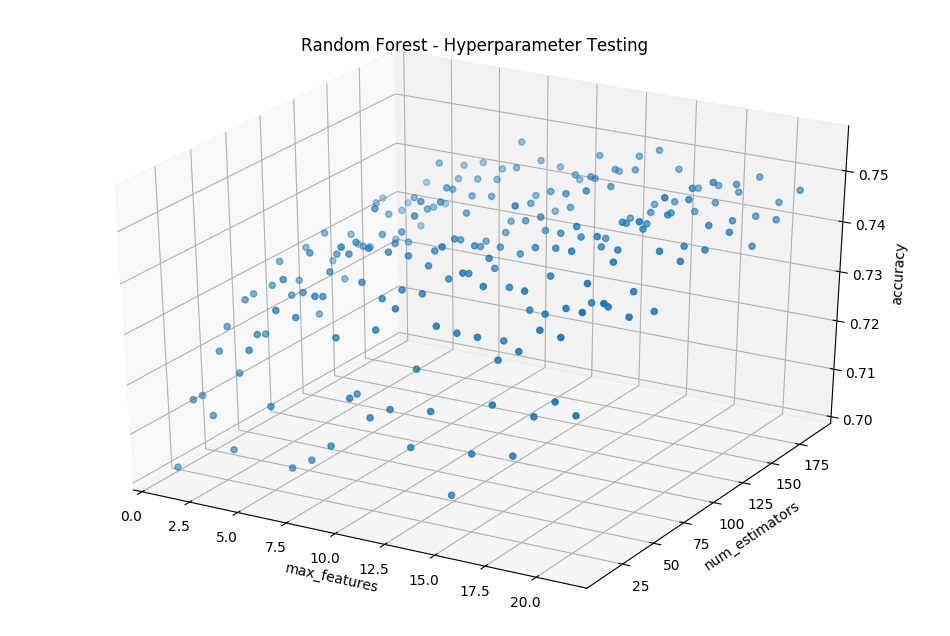

In [255]:
import re
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Data for a three-dimensional scattered points
x = results['max_features'].tolist()
y = results['num_estimators'].tolist()     # test removing .tolist() on all three lines
z = results['accuracy'].tolist()

# Creating figure
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(x, y, z, cmap = 'Greens')
plt.title("Random Forest - Hyperparameter Testing")
ax.set_xlabel('max_features')
ax.set_ylabel('num_estimators')
ax.set_zlabel('accuracy')

#Show the plot
plt.show()

In [259]:
results = results.sort_values('accuracy', ascending = False)
results.head()

,accuracy,max_features,num_estimators
185,0.754881,19.0,110.0
184,0.753055,19.0,90.0
187,0.752446,19.0,150.0
186,0.751832,19.0,130.0
124,0.751821,13.0,90.0
